**Image Processing Laboratory (045108) - Meeting 1/4**  

Signal and Image Processing Lab (SIPL) & Vision and Image Sciences Lab (VISL)  
The Andrew and Erna Viterbi Faculty of Electrical and Computer Engineering    
Technion - Israel Institute of Technology

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure, feature, filters, measure, morphology, io, transform, util
from lab_code import flir_image_extractor

# Set to True to run the notebook without waiting for user interaction
DISABLE_GUI = False


# Helper Functions

In [20]:
def visual_prep(filename, convert_to_grayscale=True, target_width = 1600):
    """
    Prepare an image for the lab: read it, optionally convert to grayscale, and
    downscale it to a target width.

    Args:
        filename (str): Path to the image file.
        convert_to_grayscale (bool, optional): Whether to convert to grayscale.
            Default: True.
        target_width (int, optional): Maximum width in pixels. Images wider than this
            are downscaled with aspect ratio preserved; narrower images keep their
            original size. Default: 1600.

    Returns:
        numpy.ndarray: The processed image as uint8.
    """

    image = io.imread(filename)
    if image.ndim == 3 and image.shape[2] == 4:
        image = color.rgba2rgb(image)
    if convert_to_grayscale and image.ndim == 3:
        image = color.rgb2gray(image)

    height, width = image.shape[:2]

    # Resize to target_width while preserving aspect ratio
    if width > target_width:
        scale = target_width / width
        new_height = int(round (height * scale))
        image = transform.resize(image, (new_height, target_width), anti_aliasing=True)

    image = util.img_as_ubyte(image)

    return image


def thermal_prep(filename):
    """
    Prepare a FLIR thermal image for the lab by reading it.

    Args:
        filename (str): Path to the FLIR thermal image file.

    Returns:
        numpy.ndarray: The prepared thermal image as a 2D float array.
    """

    image_extractor = flir_image_extractor.FlirImageExtractor()
    image_extractor.process_image(filename)
    thermal = image_extractor.extract_thermal_image()

    return thermal


def thermal_prep_uint8(filename, vmin=None, vmax=None, clip_percentiles=(2, 98)):
    """
    Prepare a FLIR thermal image for the lab by reading it and mapping its dynamic range
    to uint8.

    Args:
        filename (str): Path to the FLIR thermal image file.
        vmin/vmax (float, optional): Lower/upper raw thermal values to map to 0/255. If
            either is 'None', it is inferred from the specified 'clip_percentiles'.
            Default: None.
        clip_percentiles ((float, float), optional): Percentiles (low, high) in [0, 100]
            used to infer 'vmin'/'vmax' when not provided. Default: (2, 98).

    Returns:
        numpy.ndarray: The thermal image mapped to uint8.
    """

    thermal = thermal_prep(filename).astype(np.float32)

    # Auto-select vmin/vmax if not provided
    if vmin is None or vmax is None:
        lo, hi = np.percentile(thermal, clip_percentiles)
        vmin = lo if vmin is None else vmin
        vmax = hi if vmax is None else vmax

    scaled = (thermal - vmin) * (255.0 / max(1e-6, (vmax - vmin)))
    return np.clip(scaled, 0, 255).astype(np.uint8)


# Preparation

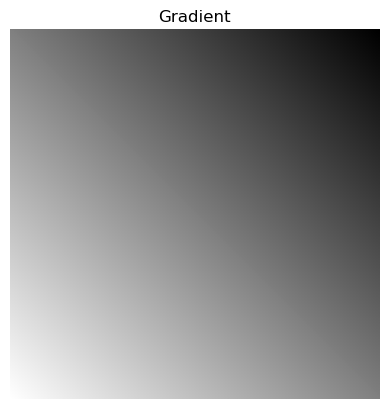

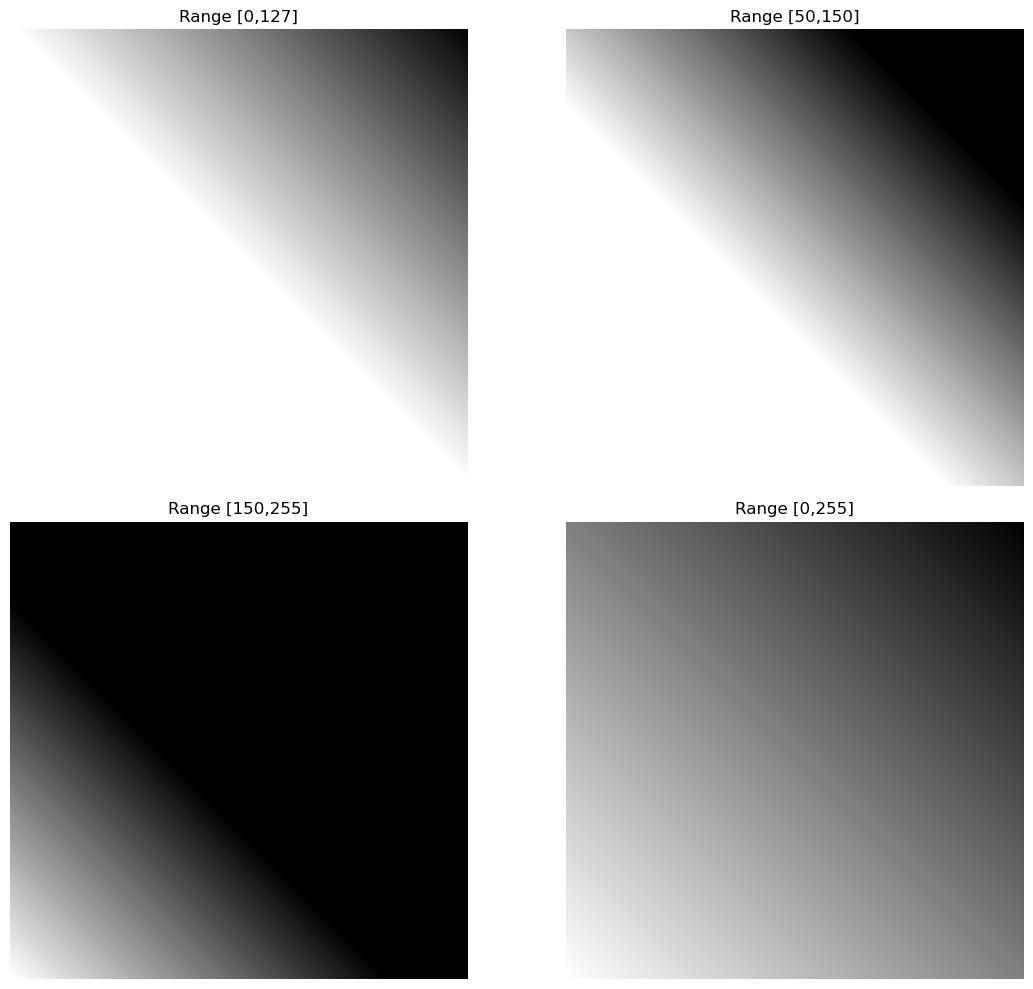

In [21]:
# Read the image
gradient_image = io.imread('C:/Users/ompal/Desktop/meet1/images/gradient.png')

# Show the image
plt.figure()
plt.imshow(gradient_image, cmap='gray')
plt.axis('off')
plt.title('Gradient')
plt.show()

# TODO: Fill in the required dynamic ranges for displaying the image
rangeA = (0,127)
rangeB = (50,150)
rangeC = (150,255)
rangeD = (0,255)

# TODO: Show four versions of the image using the dynamic ranges above
#       Use the 'plt.imshow' function with the parameters 'vmin' and 'vmax'
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(gradient_image, cmap='gray', vmin=0, vmax=127)
plt.title('Range [0,127]')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_image, cmap='gray', vmin=50, vmax=150)
plt.title('Range [50,150]')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_image, cmap='gray', vmin=150, vmax=255)
plt.title('Range [150,255]')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gradient_image, cmap='gray', vmin=0, vmax=255)
plt.title('Range [0,255]')
plt.axis('off')

plt.tight_layout()

plt.show()


# Assignment 1 - Image Acquisition

Text(0.5, 1.0, 'thermal3')

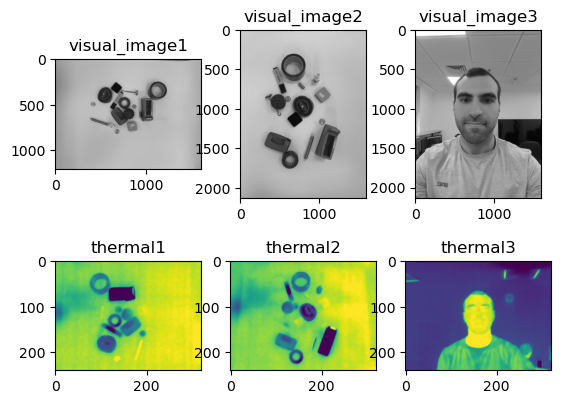

In [22]:
# TODO: Read a visual image and prepare it for the lab
visual_image1 = visual_prep('C:/Users/ompal/Desktop/meet1/images/regular.jpg')
visual_image2 = visual_prep('C:/Users/ompal/Desktop/meet1/images/reorganize.jpg')
visual_image3 = visual_prep('C:/Users/ompal/Desktop/meet1/images/face.jpg')


# TODO: Read a thermal image and convert it to uint8
thermal_image1_uint8 = thermal_prep_uint8('C:/Users/ompal/Desktop/meet1/images/regular_thermal.jpg')
thermal_image2_uint8 = thermal_prep_uint8('C:/Users/ompal/Desktop/meet1/images/reorganize_thermal.jpg')
thermal_image3_uint8 = thermal_prep_uint8('C:/Users/ompal/Desktop/meet1/images/face_thermal.jpg')


# TODO: Add two more visual image variables and two more thermal image


#       variables, then show the six images

plt.subplot(2, 3, 1)
plt.imshow(visual_image1, cmap = 'gray')
plt.title('visual_image1')


plt.subplot(2, 3, 2)
plt.imshow(visual_image2, cmap = 'gray')
plt.title('visual_image2')

plt.subplot(2, 3, 3)
plt.imshow(visual_image3, cmap = 'gray')
plt.title('visual_image3')

plt.subplot(2, 3, 4)
plt.imshow(thermal_image1_uint8)
plt.title('thermal1')

plt.subplot(2, 3, 5)
plt.imshow(thermal_image2_uint8)
plt.title('thermal2')

plt.subplot(2, 3, 6)
plt.imshow(thermal_image3_uint8)
plt.title('thermal3')

# Assignment 2 - Dynamic Range and Histograms

Minimum value: 0
Maximum value: 255
Mean value: 103.19


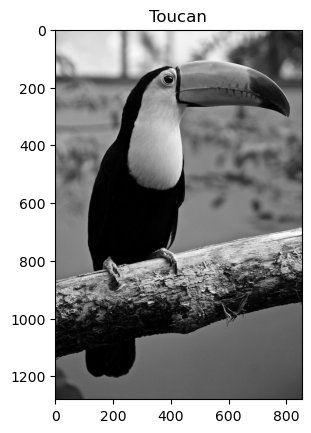

In [23]:
# Question 1

# TODO: Read 'toucan.jpg' using the 'io.imread' function
toucan_image = io.imread('C:/Users/ompal/Desktop/meet1/images/toucan.jpg')

# TODO: Show the image in grayscale using matplotlib with a grayscale colormap

plt.subplot(1, 1, 1)
plt.imshow(toucan_image, cmap = 'gray')
plt.title('Toucan')

# TODO: Set the plot title to 'Toucan'

# TODO: Show the plot

# TODO: Use NumPy to compute the requested image statistics
min_value = int(toucan_image.min())
max_value = int(toucan_image.max())
mean_value = (toucan_image.mean())

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Mean value: {mean_value:.2f}")


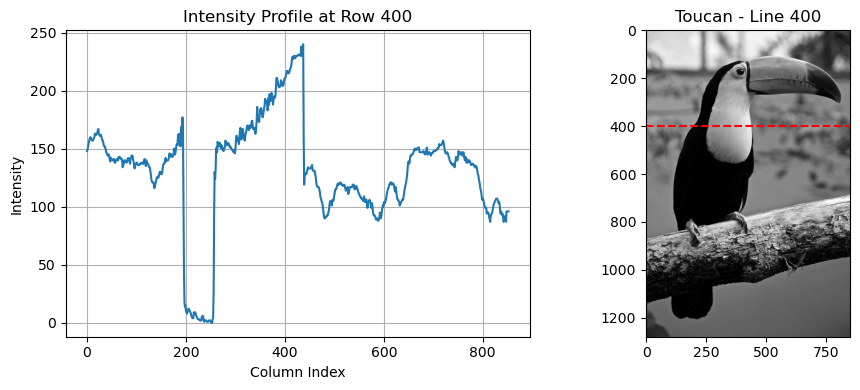

In [24]:
# Question 2

num_columns = toucan_image.shape[1]
row_N = 400

# Create an array with the x-axis values from 0 to 'num_columns' - 1
x_axis = np.arange(num_columns)

# TODO: Extract the values of row 'row_N' from 'toucan_image'
y_axis = toucan_image[row_N, :]

plt.figure(figsize=(10, 4))

# TODO Create the first subplot for intensity profile using matplotlib with a 1x2 grid,
#      occupying the first position

# TODO Plot the intensity profile using the x-axis and y-axis values

# TODO Add gridlines to the subplot for readability using the 'plt.grid' function
plt.subplot(1, 2, 1)
plt.plot(x_axis, y_axis)
plt.grid(True)
plt.xlabel('Column Index')
plt.ylabel('Intensity')
plt.title(f"Intensity Profile at Row {row_N}")

# Second subplot: Toucan Image
plt.subplot(1, 2, 2)
plt.axhline(y=row_N, color='red', linestyle='--')
plt.imshow(toucan_image, cmap='gray')
plt.title(f'Toucan - Line {row_N}')

plt.tight_layout()
plt.show()


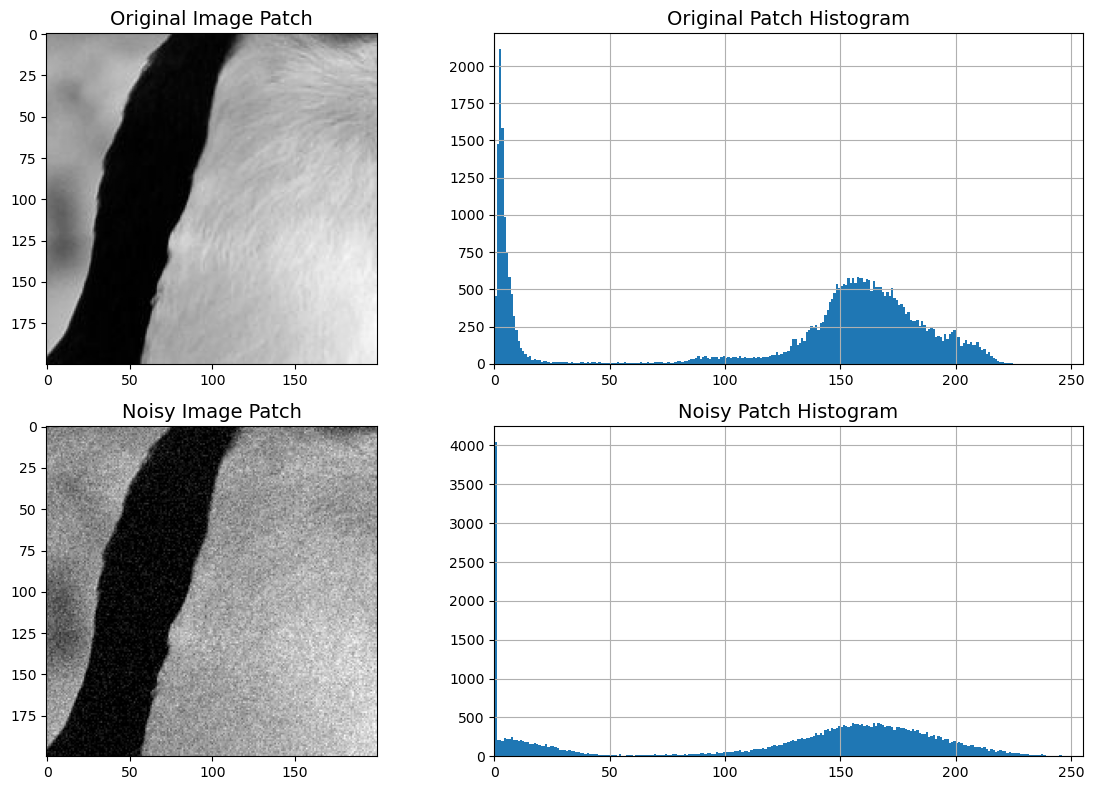

In [25]:
# Question 3

# TODO: Add Gaussian noise to toucan_image
noise_mean = 0
noise_std = 0.07
noise_variance = noise_std ** 2

noisy_image = util.random_noise(util.img_as_float32(toucan_image), mode='gaussian', mean=noise_mean, var=noise_variance)
noisy_image = util.img_as_ubyte(noisy_image)

# Show a patch from the original image and its histogram
plt.figure(figsize=(12, 8))

toucan_patch = (slice(200,400), slice(200,400))

plt.subplot(2, 2, 1)
plt.imshow(toucan_image[toucan_patch], cmap='gray')
plt.title('Original Image Patch', fontsize=14)

plt.subplot(2, 2, 2)
# TODO: Compute and show the histogram using the 'plt.hist' function with the following parameters:
#  - 'toucan_image[toucan_patch].ravel()' flattens the 2D array to a 1D array
#  - 'bins=N' divides the range of pixel values into N equal-width bins
#  - 'range=(0, 256)' specifies the range of pixel values to be considered in the histogram
#  - 'density=True' normalizes the histogram to represent probability densities on the y-axis

plt.hist(toucan_image[toucan_patch].ravel(), bins = 256, range = (0 , 256), density = False)
plt.xlim(0, 255)
plt.title('Original Patch Histogram', fontsize=14)
plt.grid(True)

# Show the same patch of the noisy image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(noisy_image[toucan_patch], cmap='gray')
plt.title('Noisy Image Patch', fontsize=14)

plt.subplot(2, 2, 4)
# TODO: Compute and show the histogram using the 'plt.hist' function as above
plt.hist(noisy_image[toucan_patch].ravel(), bins = 256, range = (0 , 256), density = False)
plt.xlim(0, 255)
plt.title('Noisy Patch Histogram', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


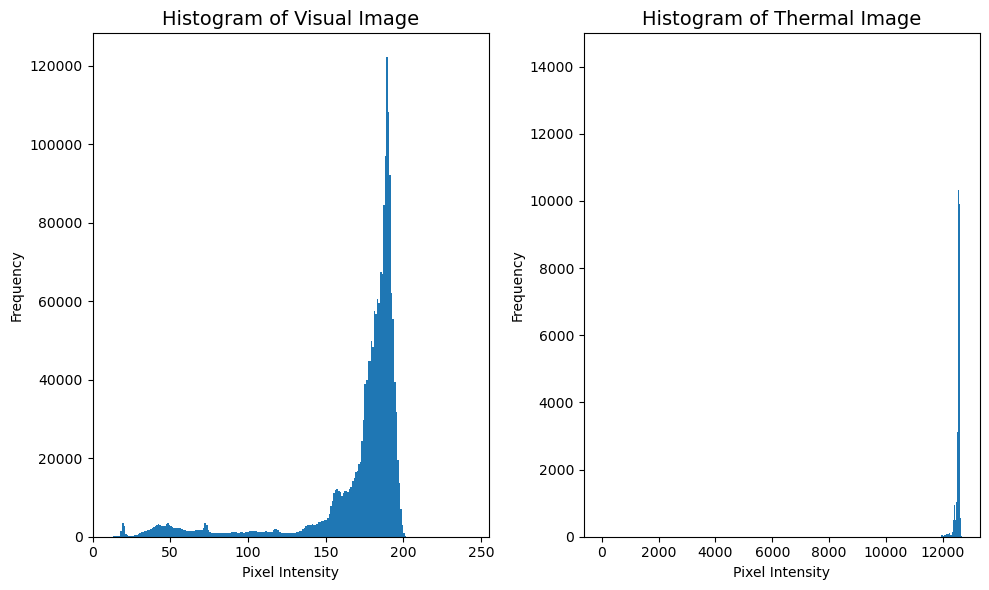

In [31]:
# Question 4

# Show visual image histogram
visual_image = visual_prep('C:/Users/ompal/Desktop/meet1/images/regular.jpg')
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(visual_image.ravel(), bins=256, range=(0, 256))
plt.xlim(0, 255)
plt.title('Histogram of Visual Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# TODO: Read thermal image
thermal_image = thermal_prep('C:/Users/ompal/Desktop/meet1/images/regular_thermal.jpg')

# Show thermal image histogram
plt.subplot(1, 2, 2)
plt.hist(thermal_image.ravel(), bins=1000, range=(0, thermal_image.max()))
plt.title('Histogram of Thermal Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [32]:
# Question 5

if not DISABLE_GUI:
    # Run histogram adjustment app
    !python lab_code/hist_adjust_app.py


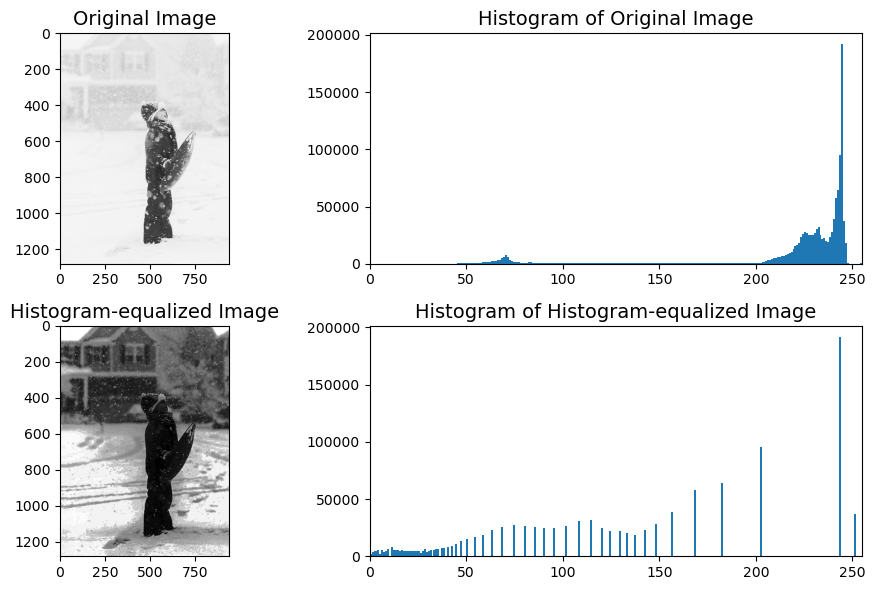

In [33]:
# Question 8
snow_image = io.imread('C:/Users/ompal/Desktop/meet1/images/snow.jpg')

# TODO: Apply histogram equalization to 'snow_image' using the 'exposure.equalize_hist'
#       function
im_eq = exposure.equalize_hist(snow_image)
im_eq = util.img_as_ubyte(im_eq) # convert back to uint8

plt.figure(figsize=(10, 6))

# Show the original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(snow_image, cmap='gray')
plt.title('Original Image', fontsize=14)

plt.subplot(2, 2, 2)
plt.hist(snow_image.ravel(), bins=256, range=(0, 256))
plt.xlim(0, 255)
plt.title('Histogram of Original Image', fontsize=14)

# Show the histogram-equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(im_eq, cmap='gray')
plt.title('Histogram-equalized Image', fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(im_eq.ravel(), bins=256, range=(0, 256))
plt.xlim(0, 255)
plt.title('Histogram of Histogram-equalized Image', fontsize=14)

plt.tight_layout()
plt.show()


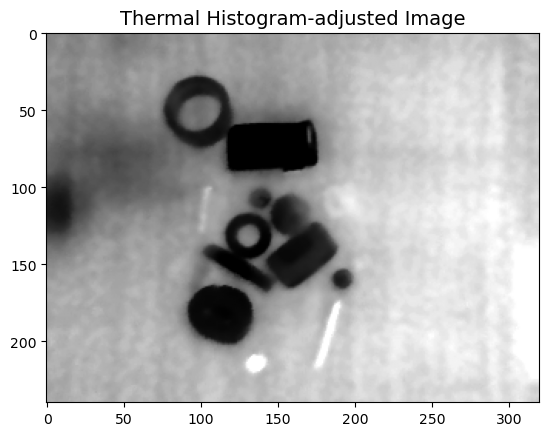

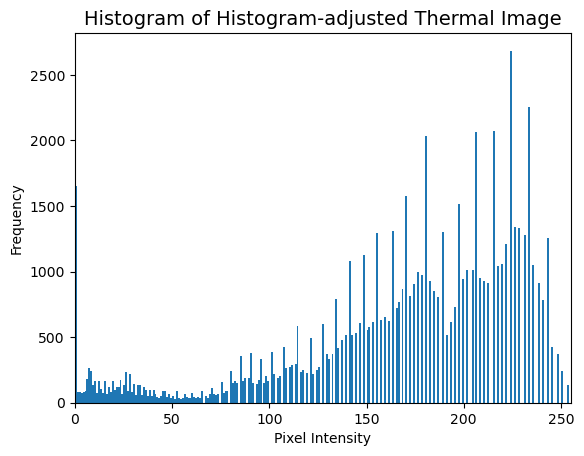

In [34]:
# Question 9

# TODO: Adjust the histogram of the thermal image (in uint8)
#       You can try:
#           Contrast stretching - multiply a constant
#           Brightness enhancement - add a constant
#           Gamma correction - use the 'exposure.adjust_gamma' function
#           Histogram equalization - use the 'exposure.equalize_hist' function and
#               then the 'util.img_as_ubyte' function
thermal_adjusted = exposure.adjust_gamma(thermal_image1_uint8, gamma = 2.5)

# Show the histogram-adjusted thermal image and its histogram
plt.imshow(thermal_adjusted, cmap='gray')
plt.title('Thermal Histogram-adjusted Image', fontsize=14)
plt.show()
plt.hist(thermal_adjusted.ravel(), bins=256, range=(0, 256))
plt.xlim(0, 255)
plt.title('Histogram of Histogram-adjusted Thermal Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


# Assignment 3 - Edge Detection

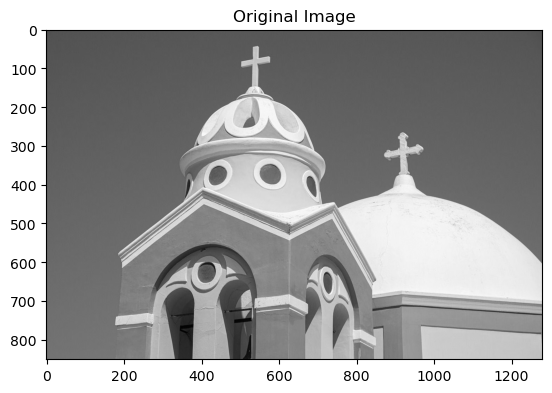

In [35]:
# Question 1

# Load and show image
church_image = io.imread('C:/Users/ompal/Desktop/meet1/images/church.jpg')
plt.figure()
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')
plt.show()


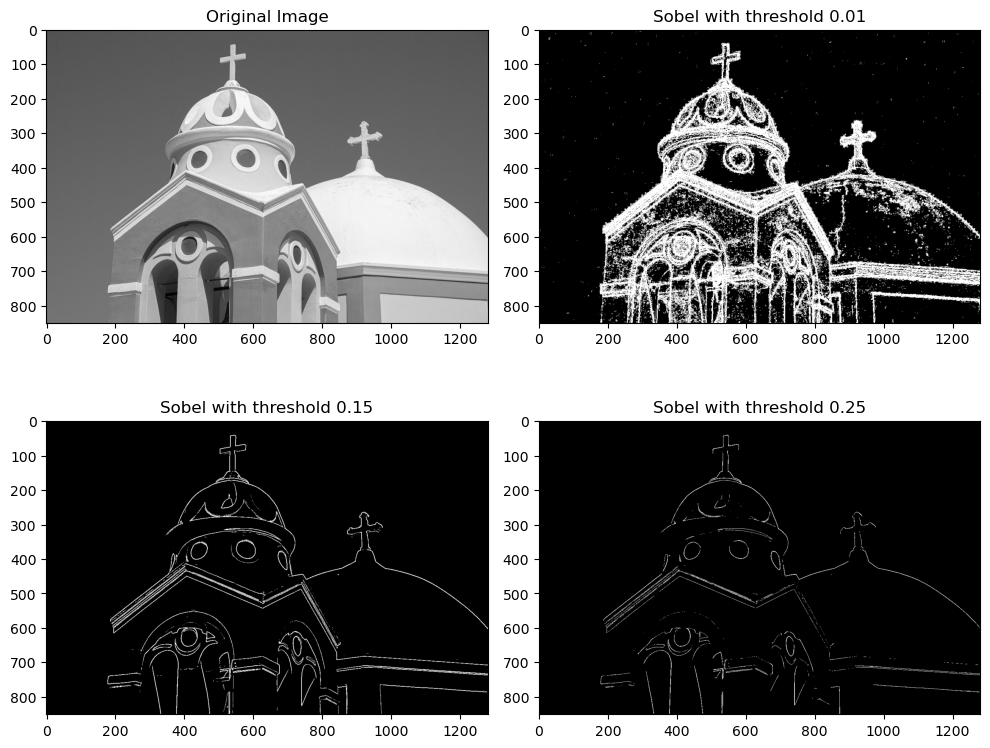

In [ ]:
# Sobel edge detector

def sobel_edge_detection(image, threshold):
    """
    Detects edges in an image using the Sobel edge detector.

    Args:
        image (np.ndarray): Grayscale input image.
        threshold (float): Threshold applied to the normalized Sobel magnitude.

    Returns:
      np.ndarray: Boolean edge map ('True' at edge locations).
    """
    gradients = filters.sobel(image)       # Apply the Sobel filter
    edges = gradients > threshold          # Threshold the gradient magnitudes

    return edges


sobel_thresholds = np.array([0.01, 0.15, 0.25])

# TODO: Apply the Sobel edge detector with different threshold values
sobel_edges_1 = sobel_edge_detection(church_image, sobel_thresholds[0])
sobel_edges_2 = sobel_edge_detection(church_image, sobel_thresholds[1])
sobel_edges_3 = sobel_edge_detection(church_image, sobel_thresholds[2])

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edges_1, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[0]}')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges_2, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[1]}')

plt.subplot(2, 2, 4)
plt.imshow(sobel_edges_3, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[2]}')

plt.tight_layout()
plt.show()


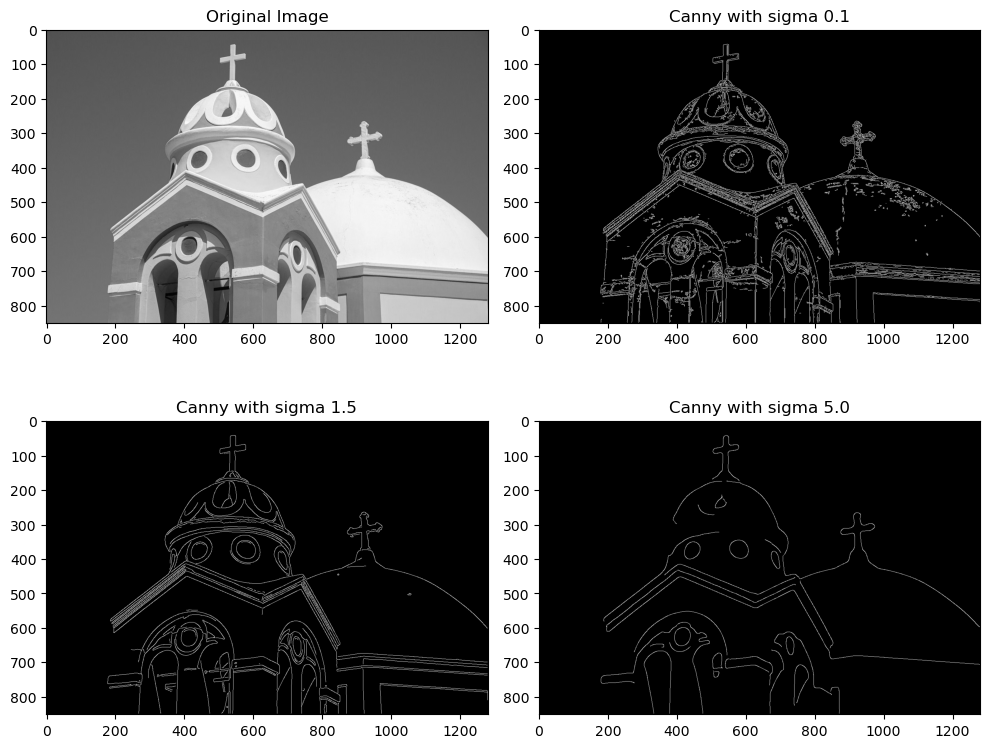

In [ ]:
# Canny edge detector

canny_sigmas = np.array([0.1, 1.5, 5])

# TODO: Apply Canny edge detector with different sigma values
canny_edges_1 = feature.canny(church_image, sigma=canny_sigmas[0])
canny_edges_2 = feature.canny(church_image, sigma=canny_sigmas[1])
canny_edges_3 = feature.canny(church_image, sigma=canny_sigmas[2])

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(canny_edges_1, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[0]}')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges_2, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[1]}')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges_3, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[2]}')

plt.tight_layout()
plt.show()


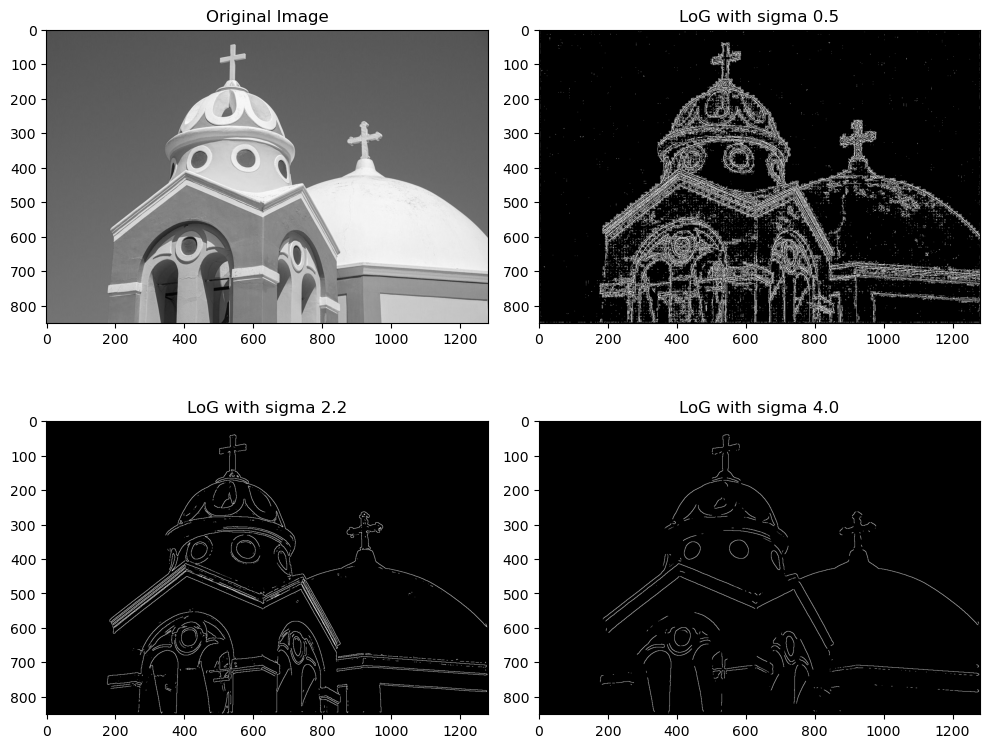

In [36]:
# Laplacian of Gaussian edge detector

def LoG_edge_detection(image, sigma=1.0, threshold=0.1):
    """
    Detects edges in an image using the Laplacian of Gaussian detector.

    Args:
        image (np.ndarray): Grayscale input image.
        sigma (float, optional): Standard deviation of the Gaussian filter.
            Default: 1.0.
        threshold (float, optional): Edge strength threshold applied to local
            zeroâ€‘crossing contrast. Default: 0.1.

    Returns:
        np.ndarray: Float (0/1) edge map (1 at edge locations).
    """

    blurred = filters.gaussian(image, sigma=sigma, mode='constant', cval=0.0)
    LoG = filters.laplace(blurred)
    th = 10 * np.abs(LoG).mean() * threshold        # Compute the threshold

    output = np.zeros(LoG.shape)
    height, width = output.shape

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            patch = LoG[y-1:y+2, x-1:x+2]      # Extract the 3Ã—3 neighborhood
            if patch[1,1] < 0:                 # Cases with a negative center
                if (patch.max() > 0) and (patch.max()-patch[1,1]>th):
                    output[y, x] = 1;
            elif patch[1,1]==0:
                if (np.sign(patch[0,1]) * np.sign(patch[2,1]) < 0) and (np.abs(patch[2,1] - patch[0,1]) > th): # Check [- 0 +]', [+ 0 -]'
                    output[y, x] = 1;
                if (np.sign(patch[1,0]) * np.sign(patch[1,2]) < 0) and (np.abs(patch[1,2] - patch[1,0]) > th): # Check [- 0 +], [+ 0 -]
                    output[y, x] = 1;
                if (np.sign(patch[0,0]) * np.sign(patch[2,2]) < 0) and (np.abs(patch[2,2] - patch[0,0]) > th): # Check main diagonal
                    output[y, x] = 1;
                if (np.sign(patch[2,0]) * np.sign(patch[0,2]) < 0) and (np.abs(patch[0,2] - patch[2,0]) > th): # Check inverse diagonal
                    output[y, x] = 1;

    return output


LoG_threshold = 0.2
LoG_sigmas = np.array([0.5, 2.2, 4])

# TODO: Apply the Laplacian of Gaussian edge detector with different sigma values
LoG_edges_1 = LoG_edge_detection(church_image, LoG_sigmas[0], LoG_threshold)
LoG_edges_2 = LoG_edge_detection(church_image, LoG_sigmas[1], LoG_threshold)
LoG_edges_3 = LoG_edge_detection(church_image, LoG_sigmas[2], LoG_threshold)

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(LoG_edges_1, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[0]}')

plt.subplot(2, 2, 3)
plt.imshow(LoG_edges_2, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[1]}')

plt.subplot(2, 2, 4)
plt.imshow(LoG_edges_3, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[2]}')

plt.tight_layout()
plt.show()


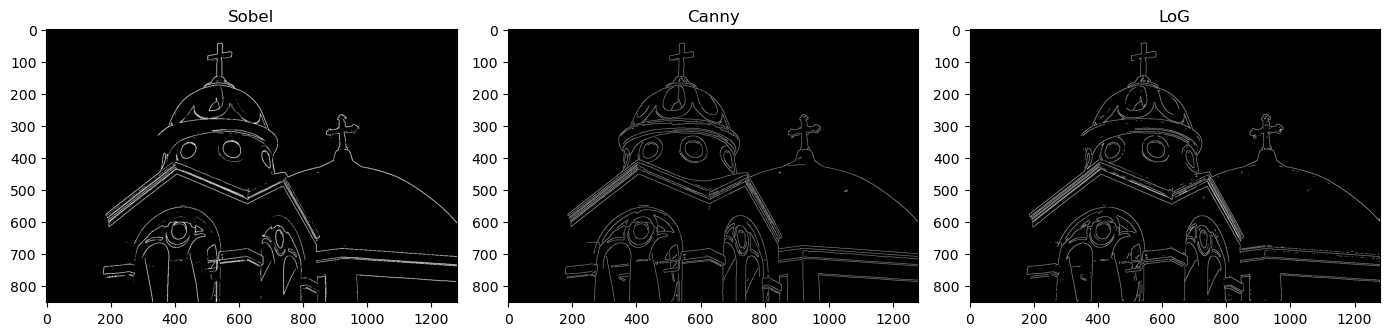

In [ ]:
# Question 2

# TODO: Select the best edge detection results from the previous question
best_sobel = sobel_edges_2
best_canny = canny_edges_2
best_LoG = LoG_edges_2

plt.figure(figsize=(14, 14))

plt.subplot(1, 3, 1)
plt.imshow(best_sobel, cmap='gray')
plt.title('Sobel')

plt.subplot(1, 3, 2)
plt.imshow(best_canny, cmap='gray')
plt.title('Canny')

plt.subplot(1, 3, 3)
plt.imshow(best_LoG, cmap='gray')
plt.title('LoG')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Thermal edges')

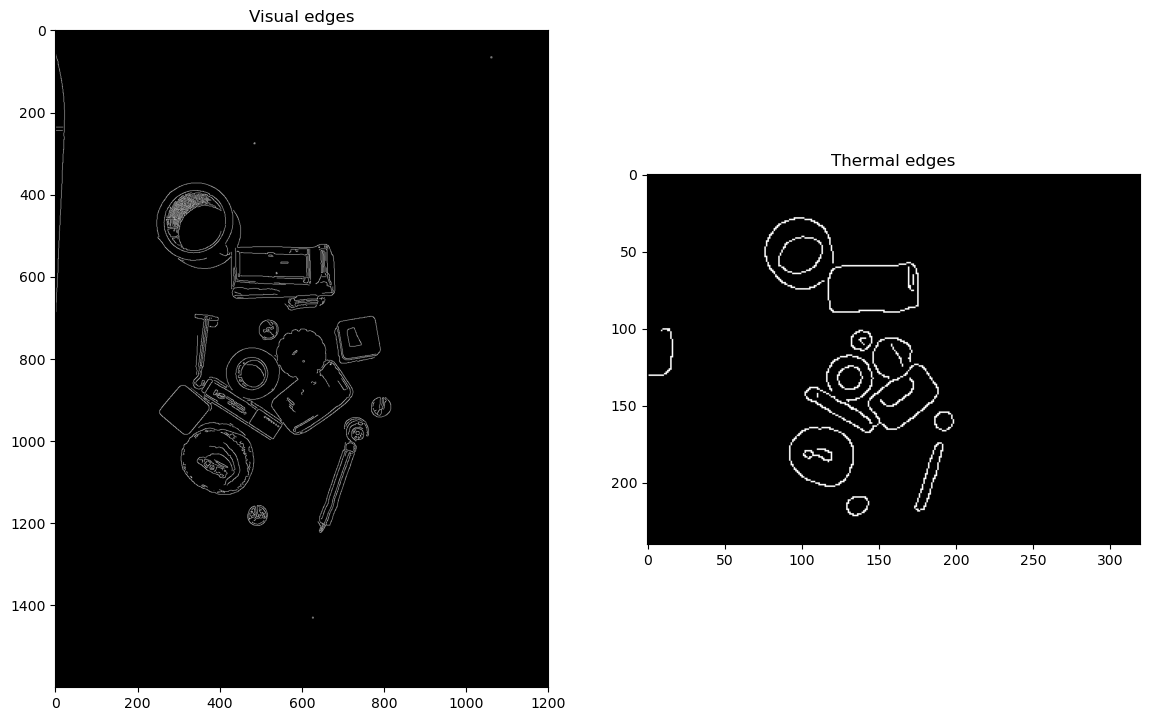

In [ ]:
# Question 3

# TODO: Perform Canny edge detection on a visual image you took and show the result
visual_edges = feature.canny(visual_image1, sigma=1.2)
# TODO: Perform Canny edge detection on a thermal image of the same scene (use the uint8
thermal_edges = feature.canny(thermal_image1_uint8, sigma=1.2)

#       thermal image) and show the result
plt.figure(figsize=(14, 14))

plt.subplot(1, 2, 1)
plt.imshow(visual_edges, cmap = 'gray')
plt.title('Visual edges')

plt.subplot(1, 2, 2)
plt.imshow(thermal_edges, cmap = 'gray')
plt.title('Thermal edges')



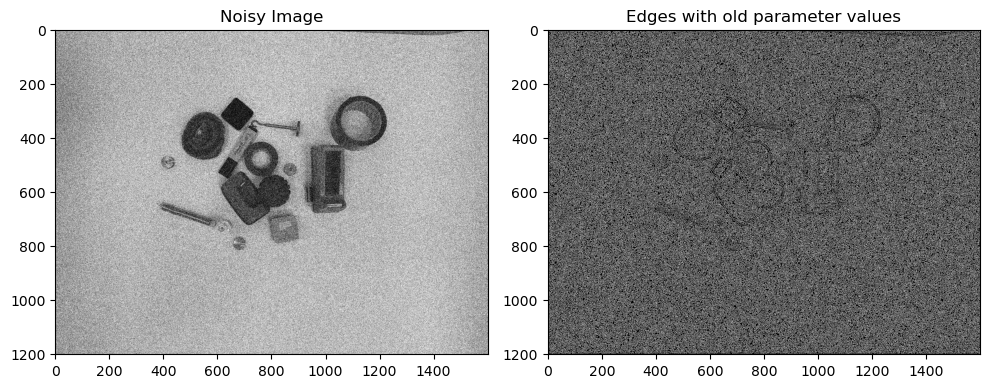

In [37]:
# Question 4

noise_std = 0.22
noise_variance = np.power(noise_std,2)
noise_mean = 0

noisy_image = util.random_noise(visual_image, mode='gaussian', mean=noise_mean, var=noise_variance)
noisy_image = (noisy_image * 255).astype(np.uint8)

# TODO: Perform Canny edge detection on the noisy visual image with the same parameter
#       values as in the previous question
noisy_image_edges = feature.canny(noisy_image, sigma=1.2)

# Show the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image_edges, cmap='gray')
plt.title('Edges with old parameter values')

plt.tight_layout()
plt.show()


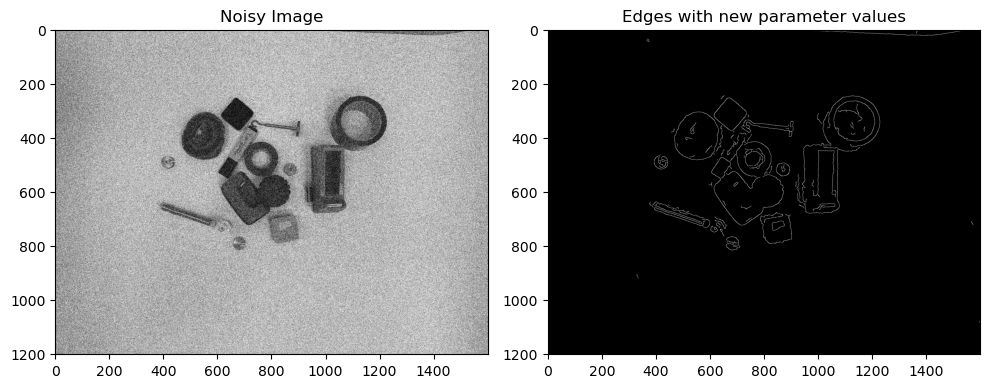

In [38]:
# Question 5

# TODO: Perform Canny edge detection on the noisy visual image with improved parameter
#       values
noisy_image_edges_better = feature.canny(noisy_image, sigma=2.7)

# Show the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image_edges_better, cmap='gray')
plt.title('Edges with new parameter values')

plt.tight_layout()
plt.show()


# Assignment 4 - Thresholding and Morphological Operations

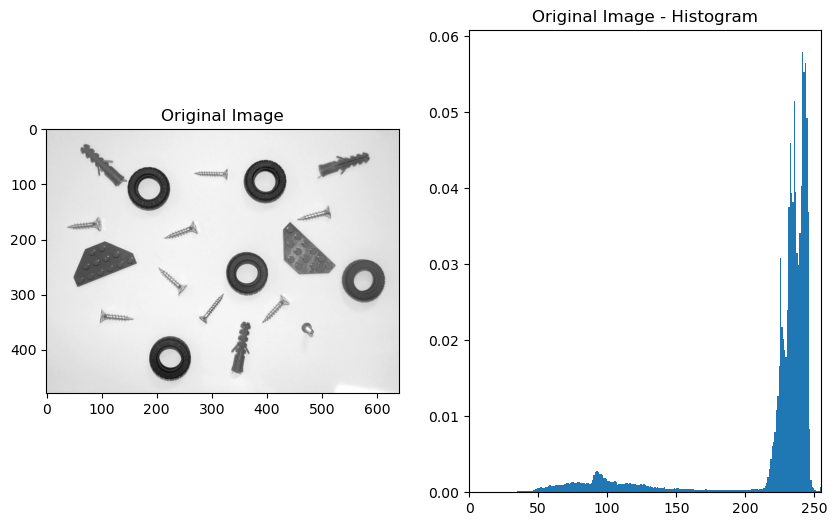

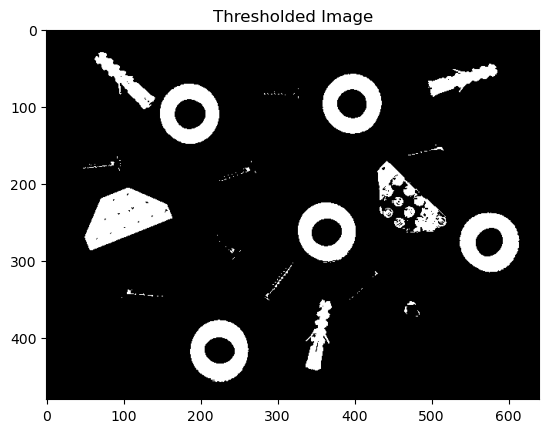

In [39]:
# Question 1

# Load the image, then show it and its histogram
pieces_image = io.imread('C:/Users/ompal/Desktop/meet1/images/pieces.png')
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(pieces_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.hist(pieces_image.ravel(), bins=256, range=[0, 256], density=True)
plt.xlim(0,255)
plt.title('Original Image - Histogram')

plt.show()

# TODO: Set the threshold value for binarization
pieces_thresh = 127  # mid range of 0-255

# TODO: Threshold the image: pixels with intensity less than the threshold become
#       True (white), others become False (black)
pieces_image_bw = pieces_image < pieces_thresh

# Convert the boolean array to uint8
pieces_image_bw = pieces_image_bw.astype(np.uint8)

# Show the thresholded image
plt.figure()
plt.imshow(pieces_image_bw, cmap='gray')
plt.title('Thresholded Image')
plt.show()


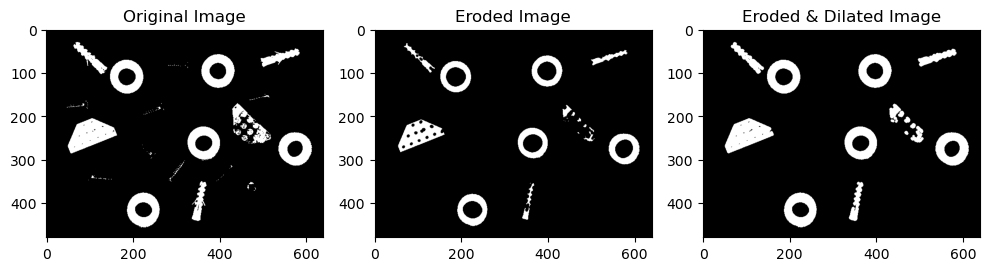

In [40]:
# Question 2

# TODO: Create a structuring element. Possible structuring elements include:
#       'morphology.disk', 'morphology.ellipse', 'morphology.square',
#       'morphology.rectangle', 'morphology.diamond', 'morphology.octagon'
strel = morphology.disk(3)

# TODO: Perform erosion on the binary image with the structuring element using the
#       'morphology.erosion' function
pieces_eroded = morphology.erosion(pieces_image_bw, strel)

# TODO: Perform dilation on the pieces_eroded image with the same structuring element
#       using the 'morphology.dilation' function
pieces_final = morphology.dilation(pieces_eroded, strel)

# Show results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(pieces_image_bw, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(pieces_eroded, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 3, 3)
plt.imshow(pieces_final, cmap='gray')
plt.title('Eroded & Dilated Image')

plt.tight_layout()
plt.show()


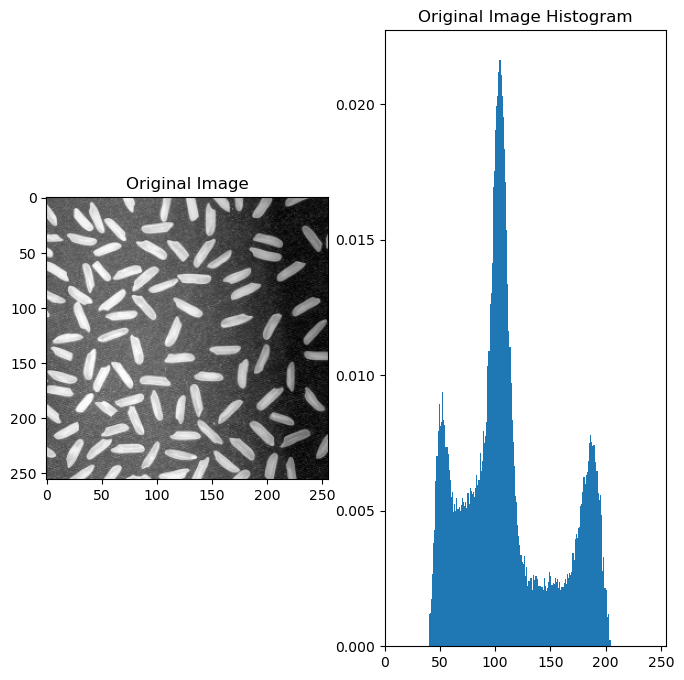

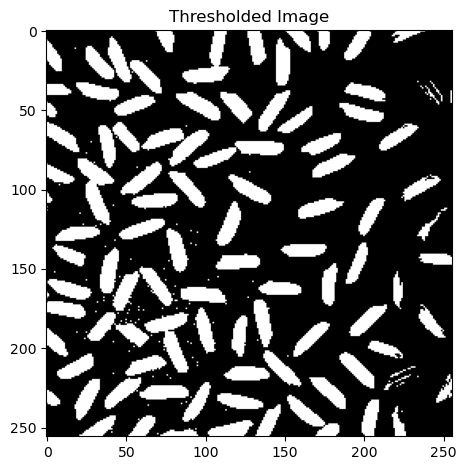

In [42]:
# Question 3

# Load the image, then show it and its histogram
rice_image = io.imread('C:/Users/ompal/Desktop/meet1/images/rice.png')
rice_image = util.img_as_ubyte(color.rgb2gray(rice_image))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(rice_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.hist(rice_image.ravel(), bins=256, range=[0, 256], density=True)
plt.xlim(0,255)
plt.title('Original Image Histogram')

# TODO: Set the threshold value for binarization
rice_thresh = 127 

# TODO: Threshold the image: pixels with intensity less than the threshold become
#       False (black), others become True (white)
rice_image_bw = rice_image > rice_thresh

# Convert the boolean array to uint8
rice_image_bw = rice_image_bw.astype(np.uint8)

# Show the thresholded image
plt.figure()
plt.imshow(rice_image_bw, cmap='gray')
plt.title('Thresholded Image')
plt.tight_layout()
plt.show()


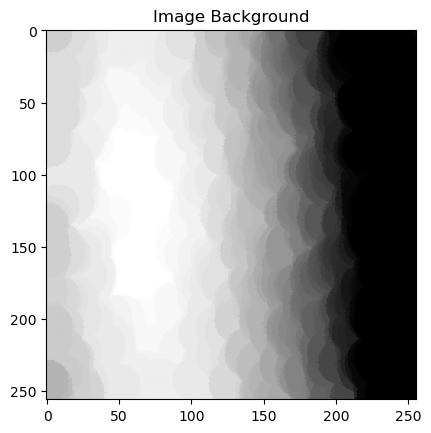

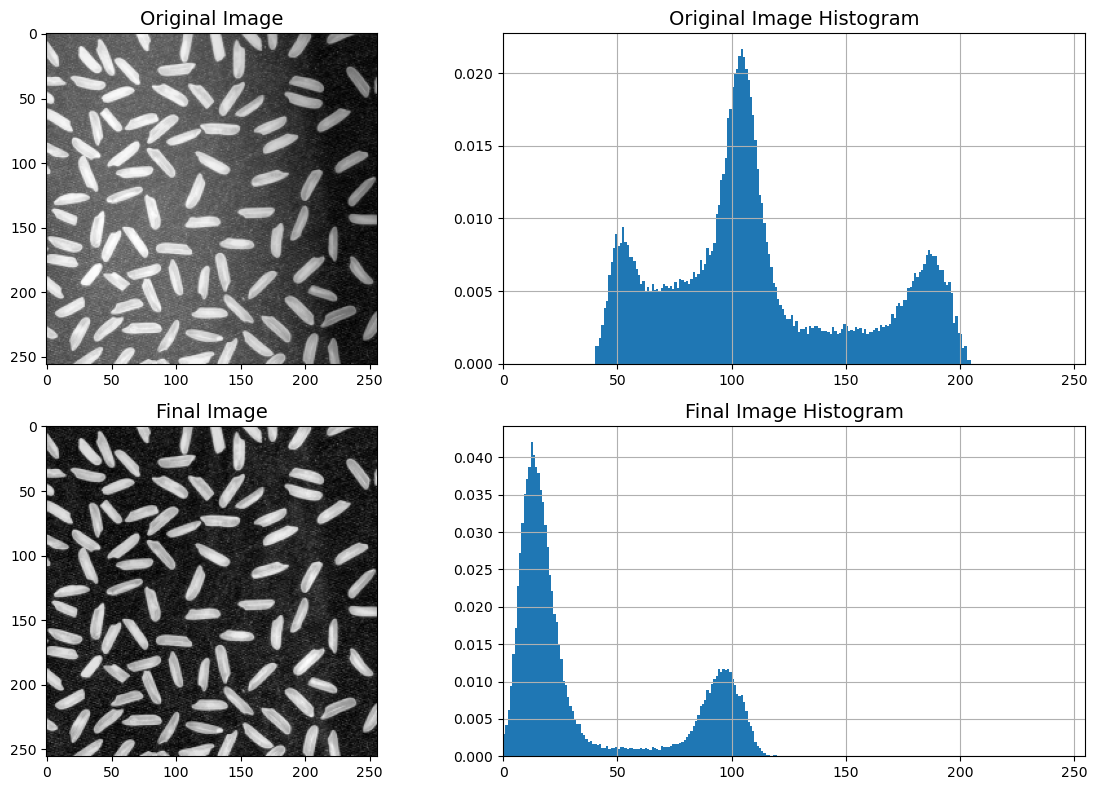

In [43]:
# Question 4

# TODO: Create a disk-shaped structuring element
strel2 = morphology.disk(15)

# TODO: Use the structuring element on the grayscale image to remove the rice grains and
#       estimate the background
rice_no_grains = (morphology.erosion(rice_image, strel2))

plt.imshow(rice_no_grains, cmap='gray')
plt.title('Image Background')
plt.show()

# TODO: Subtract the estimated background from the original image to enhance the grains
rice_final = rice_image - rice_no_grains

# Show original and enhanced image with their histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rice_image, cmap='gray')
plt.title('Original Image', fontsize=14)

plt.subplot(2, 2, 2)
plt.title('Original Image Histogram', fontsize=14)
plt.hist(rice_image.ravel(), bins=256, range=(0, 256), density=True)
plt.xlim(0,255)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.imshow(rice_final, cmap='gray')
plt.title('Final Image', fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(rice_final.ravel(), bins=256, range=(0, 256), density=True)
plt.xlim(0,255)
plt.title('Final Image Histogram', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


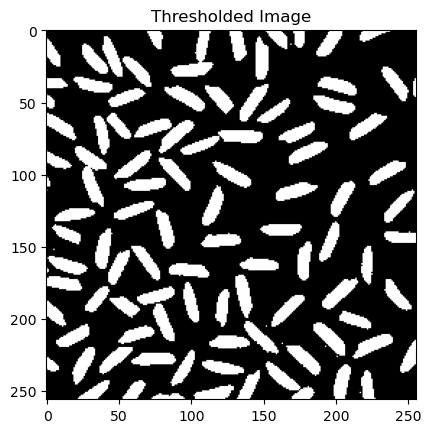

In [44]:
# Question 5

# TODO: Set the threshold value for binarization
rice_thresh2 = 50

# TODO: Threshold the enhanced image: pixels with intensity less than the threshold
#       become False (black), others become True (white)
rice_image_bw2 = rice_final > rice_thresh2

plt.figure()
plt.imshow(rice_image_bw2, cmap='gray')
plt.title('Thresholded Image')
plt.show()


# Assignment 5 - Region Properties

Number of connected components: 27


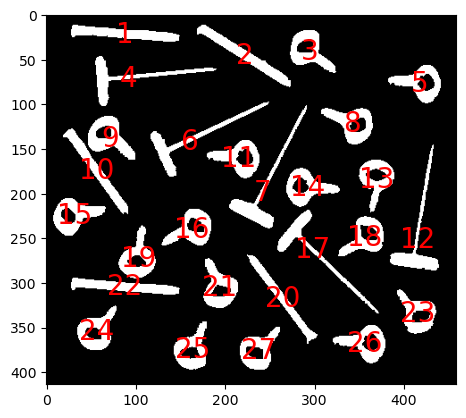

In [46]:
# Question 1

objects_image = io.imread('C:/Users/ompal/Desktop/meet1/images/objects.bmp')

# Apply connected-component labeling
objects_label_image = measure.label(objects_image, connectivity=2)

# Compute region properties
object_properties = measure.regionprops(objects_label_image)

# Print the number of connected components
components_num = len(object_properties)
print(f'Number of connected components: {components_num}')

# Show the original image with labels at region centroids
plt.imshow(objects_image, cmap='gray')
for region in object_properties:
    plt.text(region.centroid[1], region.centroid[0], region.label, color='red',
             fontsize=20, ha='center', va='center')
plt.show()


In [51]:
# Question 2

# TODO: Choose a specific object
object_num = 27 - 1
specific_object_properties = object_properties[object_num]
property_lst = ["area", "area_bbox", "area_convex", "perimeter", "centroid_local",
                "extent", "axis_major_length", "axis_minor_length", "orientation",
                "eccentricity", "solidity", "euler_number"]

# Print the selected object's properties
print(f"Properties of object #{object_num}:")
for property_name  in property_lst:
    property_value = getattr(specific_object_properties, property_name)
    print(f"  {property_name}: {property_value:}")


Properties of object #26:
  area: 1044.0
  area_bbox: 2160.0
  area_convex: 1497.0
  perimeter: 221.095454429505
  centroid_local: [25.68773946 20.48850575]
  extent: 0.48333333333333334
  axis_major_length: 54.97646197151754
  axis_minor_length: 39.3250961923353
  orientation: -0.6702604568543536
  eccentricity: 0.6988094474509087
  solidity: 0.6973947895791583
  euler_number: 0


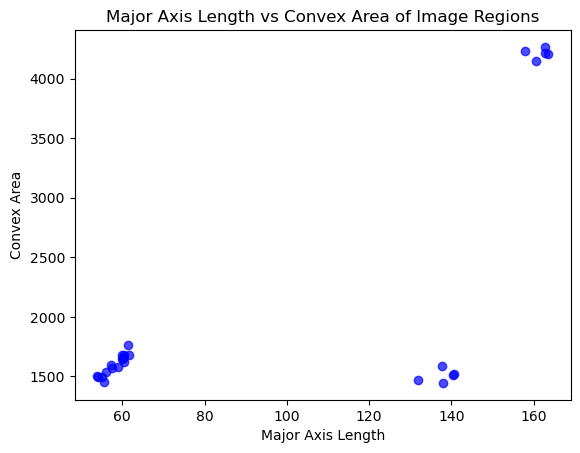

In [52]:
# Question 3

# Extract Major Axis Length and Convex Area of all image objects
major_axis_length = [region.axis_major_length for region in object_properties]
convex_area = [region.area_convex for region in object_properties]
# Show a scatter plot of the two properties
plt.figure()
plt.scatter(major_axis_length, convex_area, marker='o', color='blue', alpha=0.7)
plt.title('Major Axis Length vs Convex Area of Image Regions')
plt.xlabel('Major Axis Length')
plt.ylabel('Convex Area')
plt.show()


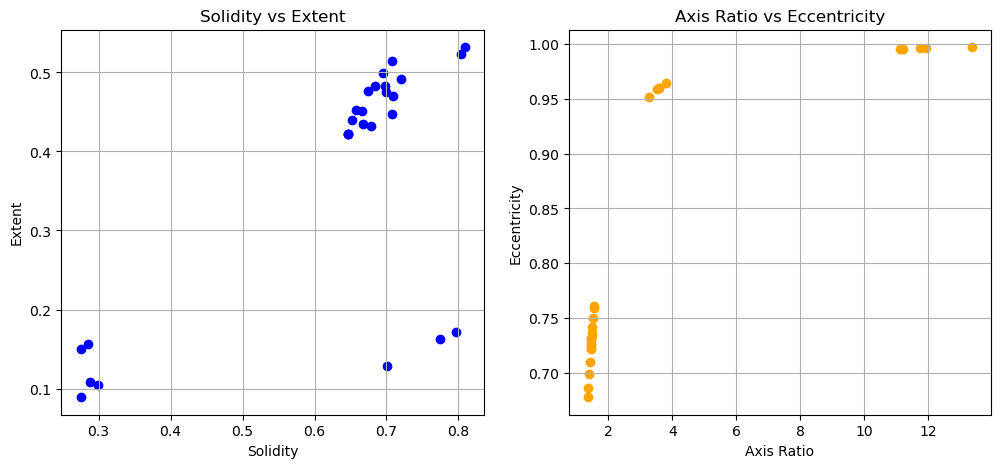

In [53]:
# Question 4

# TODO: Create two additional scatter plots using different properties
#       (each plot should use two properties not used before)

solidity = [region.solidity for region in object_properties]
extent = [region.extent for region in object_properties]
ecc = [region.eccentricity for region in object_properties]
axis_ratio = [region.axis_major_length / region.axis_minor_length for region in object_properties]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(solidity, extent, color='blue')
plt.title('Solidity vs Extent')
plt.xlabel('Solidity')
plt.ylabel('Extent')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(axis_ratio, ecc, color='orange')
plt.title('Axis Ratio vs Eccentricity')
plt.xlabel('Axis Ratio')
plt.ylabel('Eccentricity')
plt.grid(True)

# Assignment 6 - Line Detection

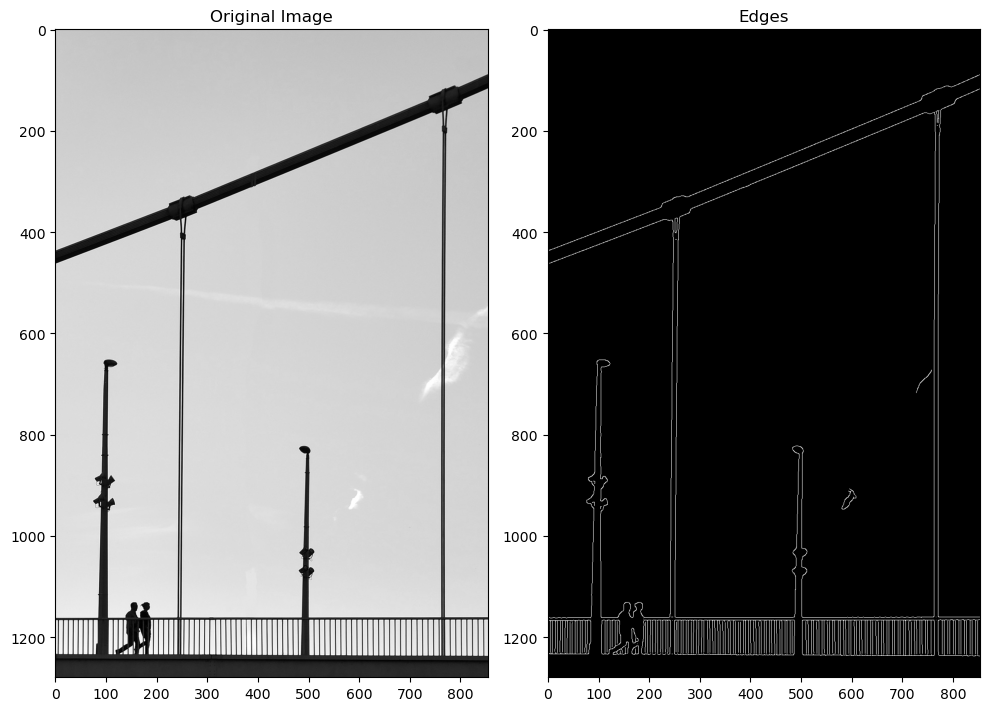

In [54]:
# Question #1

bridge_image = io.imread('C:/Users/ompal/Desktop/meet1/images/bridge.jpg')
bridge_image = color.rgb2gray(bridge_image)

# TODO: Apply Canny edge detection using the 'feature.canny' function
bridge_edges = feature.canny(bridge_image, sigma=2)

# Show the image and its edges
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.imshow(bridge_image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(bridge_edges, cmap=plt.cm.gray)
plt.title('Edges')

plt.tight_layout()
plt.show()


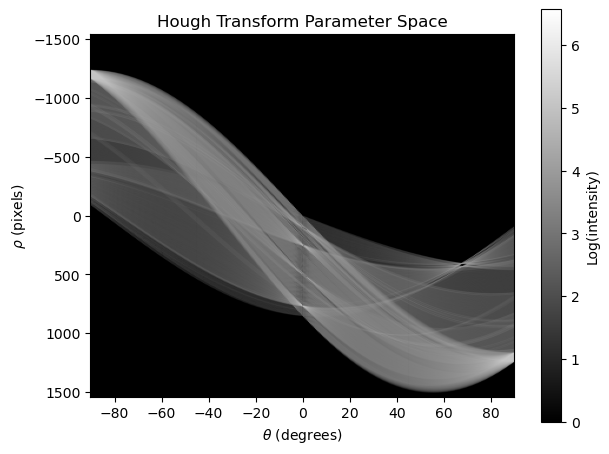

In [55]:
# Question 2

# TODO: Compute the Hough transform for angles in [-pi/2, pi/2] using the function
#       'transform.hough_line'
theta = np.linspace(-np.pi/2, np.pi/2, 360, endpoint=False)
hough_space, angles, distances = transform.hough_line(bridge_edges, theta = theta)

# Show the Hough parameter space
plt.figure()
angle_step = 0.5 * np.diff(angles).mean()
distance_step = 0.5 * np.diff(distances).mean()
bounds = [
    np.rad2deg(angles[0] - angle_step),
    np.rad2deg(angles[-1] + angle_step),
    distances[-1] + distance_step,
    distances[0] - distance_step
]
plt.imshow(np.log(1 + hough_space), extent=bounds, cmap="gray", aspect=1/20)
plt.title('Hough Transform Parameter Space')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\rho$ (pixels)')
plt.colorbar(label='Log(intensity)')
plt.tight_layout()
plt.show()


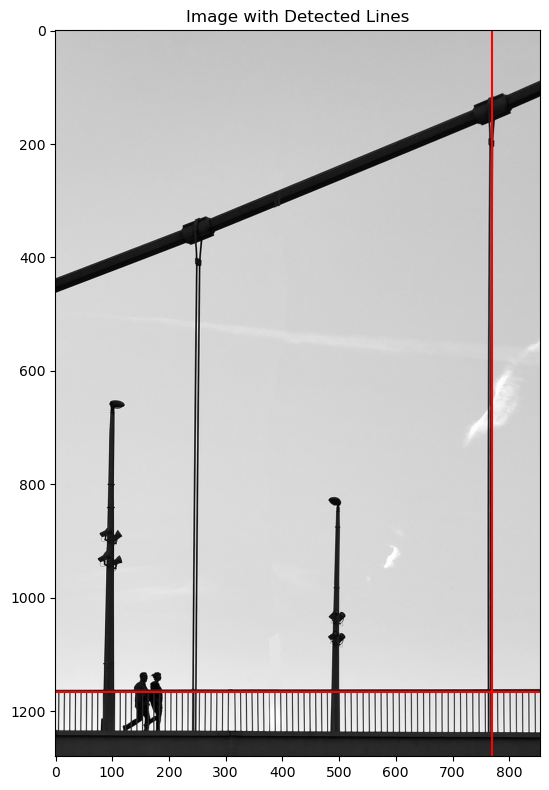

In [60]:
# Questions 4 & 5

# Detect strong lines in the parameter space

# TODO: Set the minimum peak intensity to detect (experiment with different values)
hough_peaks_threshold = 0.8
strong_peaks = transform.hough_line_peaks(
    hough_space, angles, distances, threshold=hough_peaks_threshold * np.max(hough_space))

strong_lines = []
for _, angle, distance in zip(*strong_peaks):
    x0, y0 = distance * np.array([np.cos(angle), np.sin(angle)])
    slope = np.tan(angle + np.pi/2)
    strong_lines.append(((x0, y0), slope))

bridge_image_rgb = color.gray2rgb(bridge_image)

# Show the image with detected lines in red
plt.figure(figsize=(10, 8))
axis = plt.imshow(bridge_image_rgb)
for (x0, y0), slope in strong_lines:
    plt.axline((x0, y0), slope=slope, color='red')
plt.title('Image with Detected Lines')
plt.tight_layout()
plt.show()
